# SVM

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"]==2).astype(np.float64)

In [4]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

SGDClassifierを使ってSVCを利用する方法

In [6]:
m=1; C=1
svm_sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc_sgd", SGDClassifier(loss="hinge", alpha=1/m*C))
])

# 非線形SVM

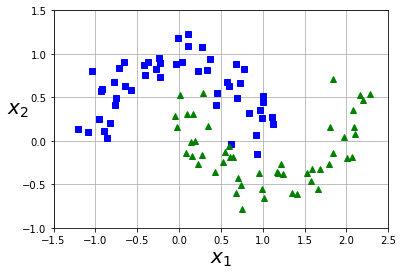

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")),
])

polynomial_svm_clf.fit(X, y)

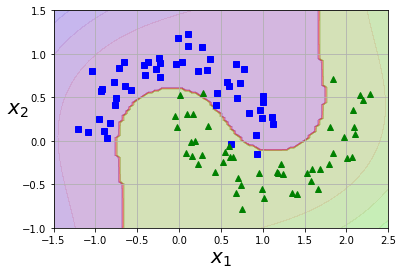

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [18]:
axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)

In [19]:
x0

array([[-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       ...,
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ]])

## 多項式カーネル

In [20]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])